In [1]:
# Import needed packages
import torch
import torch.nn as nn
from torchvision.transforms import transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

from net import *
from analysis import *

In [2]:
# load the model
path = "models/SimpleNet_conv=2_ch=32/10.pth"
model = load_model(path)

In [3]:
# Define transformations for the image, right now just converting to tensor
transform = transforms.Compose([
    # Must convert all images to tensors first to be processed.
    transforms.ToTensor(),
    # Normalize images to mean 0, variance 1 (improves training)
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

n_test = 10000
num_classes = 10

# raw images
test_set_raw = CIFAR10(root="data", train=False, download=True)
test_images = np.array([np.array(img) for (img, y) in test_set_raw])
test_labels = np.array([y for (img, y) in test_set_raw])

# Load the test set, note that train is set to False
test_set = CIFAR10(root="data", train=False, transform=transform, download=True)

# Create a temp dataset loader just to load images, with batch size 1
test_loader = DataLoader(test_set, batch_size=1,shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# get losses for each image in the test set
loss_fn = nn.CrossEntropyLoss()
losses = get_losses(model, test_loader, loss_fn)

In [5]:
print("Test loss", np.mean(losses))

Test loss 0.6897682132065296


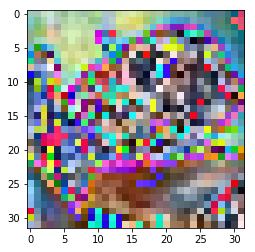

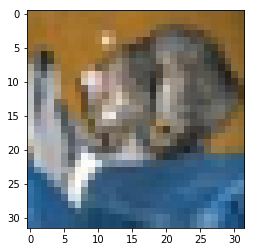

In [6]:
# verify that the order of losses corresponds to original test-set ordering

# plot the first image from the data loader
tensor, _ = next(iter(test_loader))
img = np.moveaxis(tensor[0].numpy(), 0, 2)
plt.imshow(img)
plt.show()

# plot the first image in CIFAR10-test
plt.imshow(test_images[0])
plt.show()

In [7]:
percentiles = [0., 0.2, 0.4, 0.6, 0.8, 1.0]

subset = representative_subset(losses, test_labels, num_classes, percentiles)

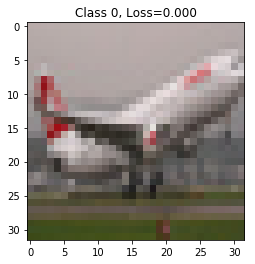

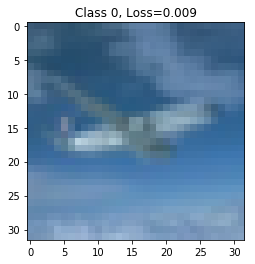

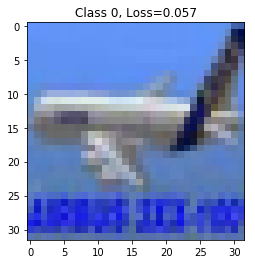

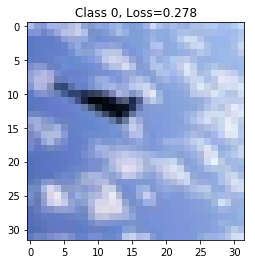

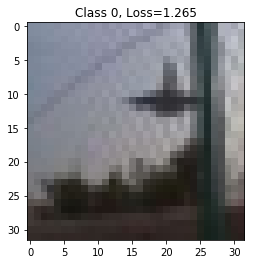

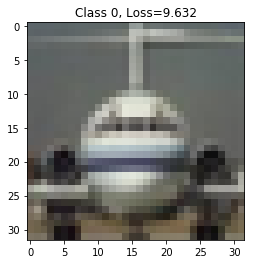

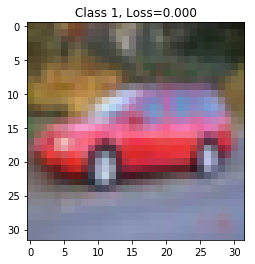

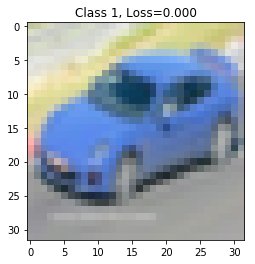

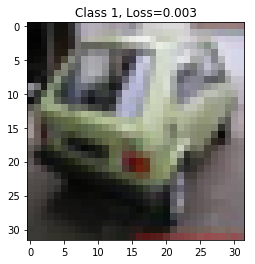

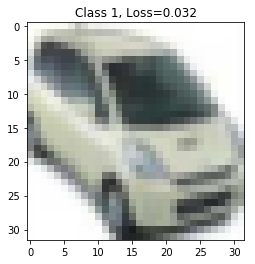

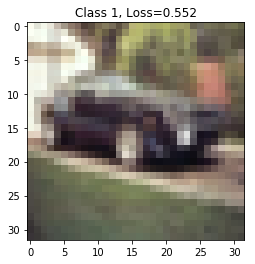

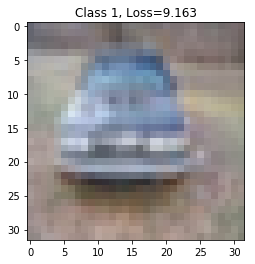

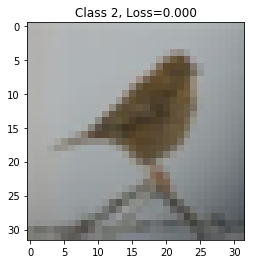

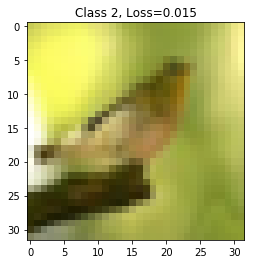

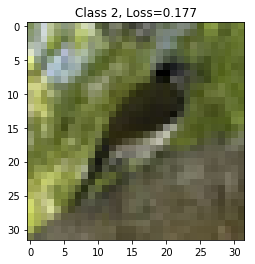

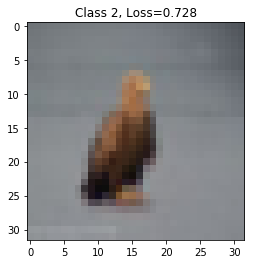

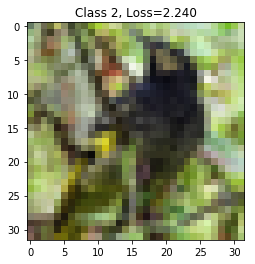

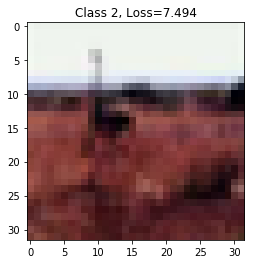

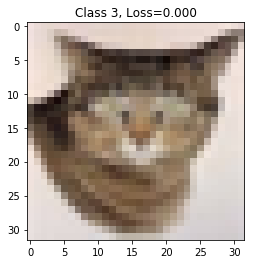

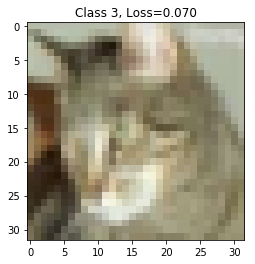

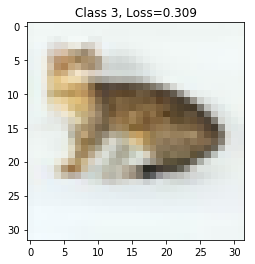

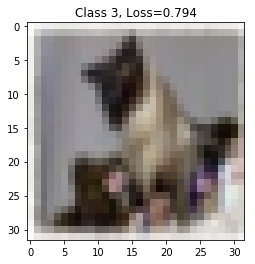

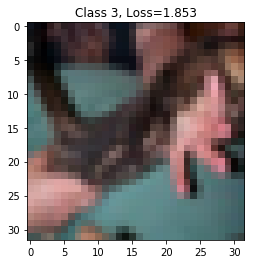

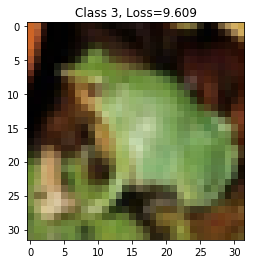

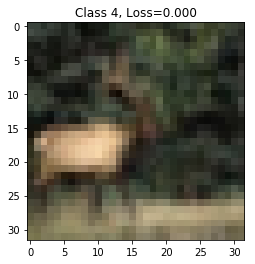

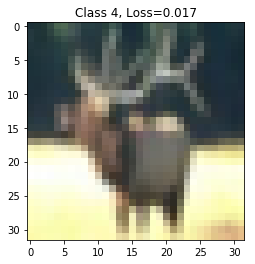

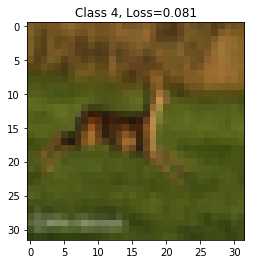

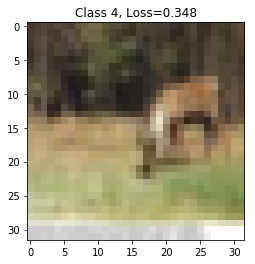

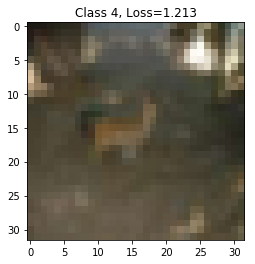

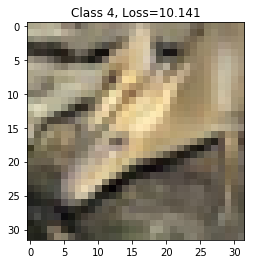

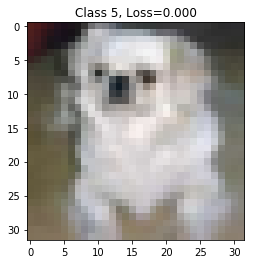

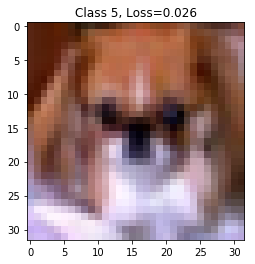

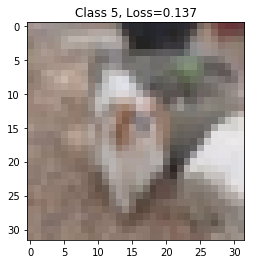

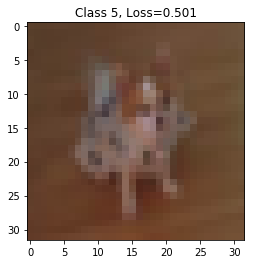

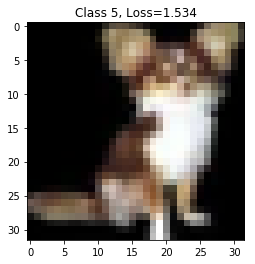

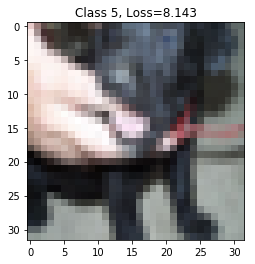

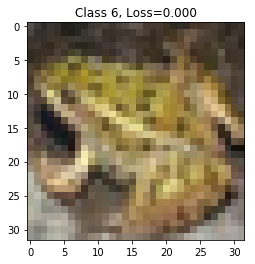

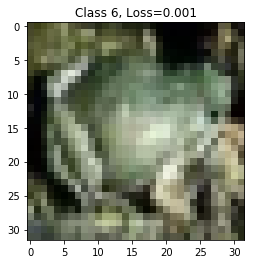

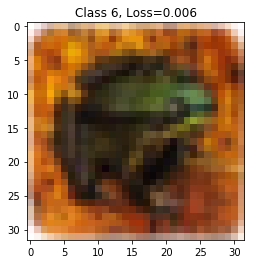

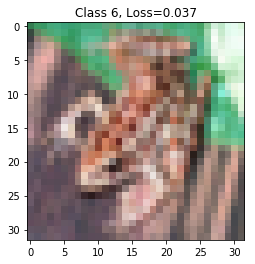

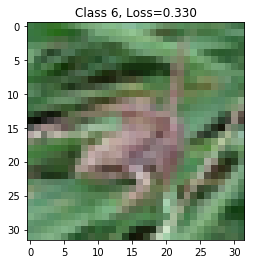

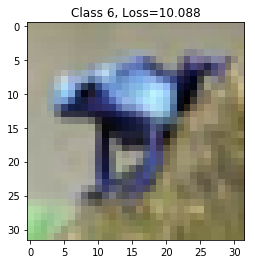

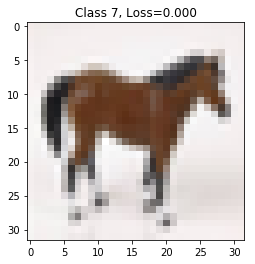

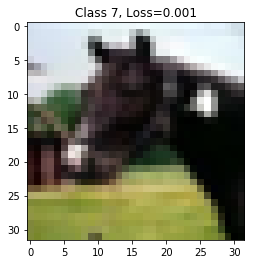

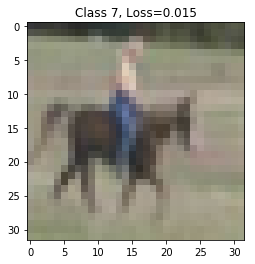

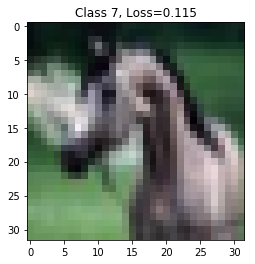

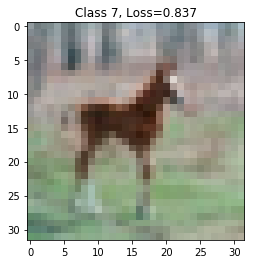

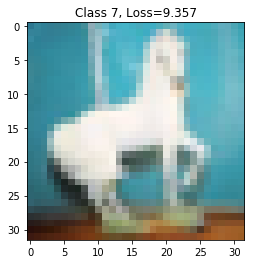

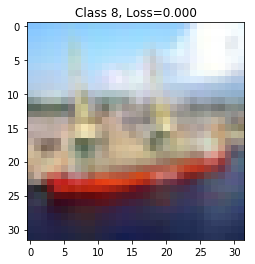

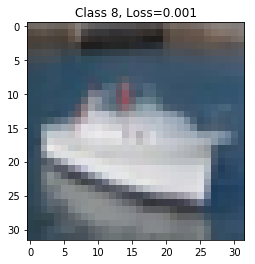

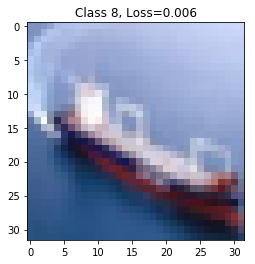

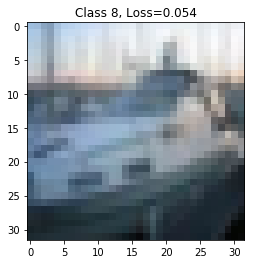

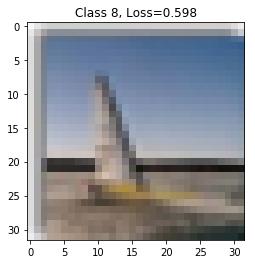

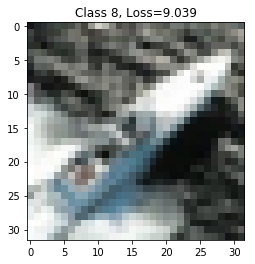

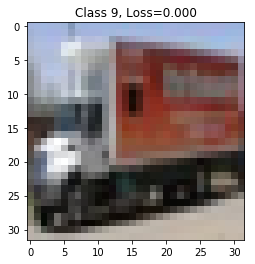

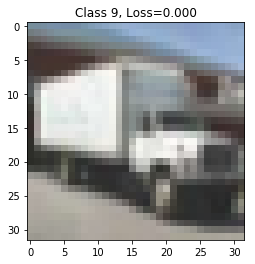

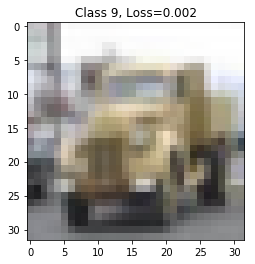

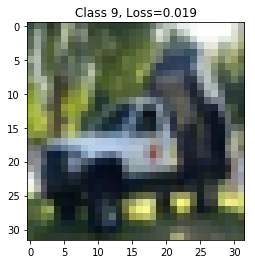

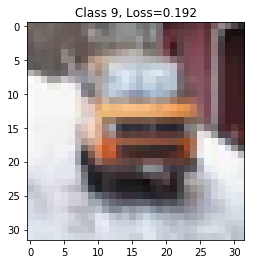

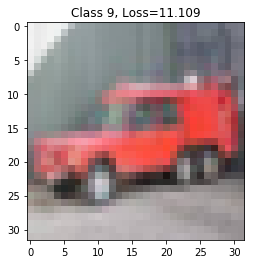

In [8]:
for i in subset:
    plt.title("Class %d, Loss=%.3f" % (test_labels[i], losses[i]))
    plt.imshow(test_images[i])
    plt.show()

In [12]:
np.random.shuffle(subset)
subset = np.array(subset, dtype=np.int64)
np.savetxt("human_trials.csv", subset, fmt='%d', delimiter=',')